In [175]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib

pd.set_option('max_columns',1000)
pd.set_option('max_rows',1000)

import warnings
warnings.filterwarnings('ignore')

import re
import geocoder
from geopy.distance import great_circle, vincenty
from tqdm import tqdm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import os
import gc
import lightgbm as lgb
from sklearn.model_selection import KFold, train_test_split
from time import time
import datetime
from script import RegressionPredictor,LogRegressionPredictor
import japanize_matplotlib
# print(os.listdir("././input"))
# print(os.listdir("././submit"))
from utils import save_data
SEED=1234
n_splits=10
import glob

In [189]:
train_dfs=sorted(glob.glob('./seed_average_all/oof*.csv'))
test_dfs=sorted(glob.glob('./seed_average_all/submit*.csv'))

In [190]:
oof_df=pd.read_csv('./submit/train_id.csv',header=None).rename(columns={0:'id',1:'target'})
pred_df=pd.read_csv('./submit/sample_submit.csv',header=None).rename(columns={0:'id',1:'target'})

In [191]:
prep=lambda x:''.join(x.strip('.csv').split('_')[1:])
train_names=[prep(x) for x in train_dfs]
test_names=[prep(x) for x in test_dfs]

In [192]:
for name,path in zip(train_names,train_dfs):
    df=pd.read_csv(path,header=None).rename(columns={0:'id',1:'target'})
    oof_df=oof_df.merge(df,how='inner',on='id',suffixes=("",f'_{name}'))

for name,path in zip(test_names,test_dfs):
    df=pd.read_csv(path,header=None).rename(columns={0:'id',1:'target'})
    pred_df=pred_df.merge(df,how='inner',on='id',suffixes=("",f'_{name}'))

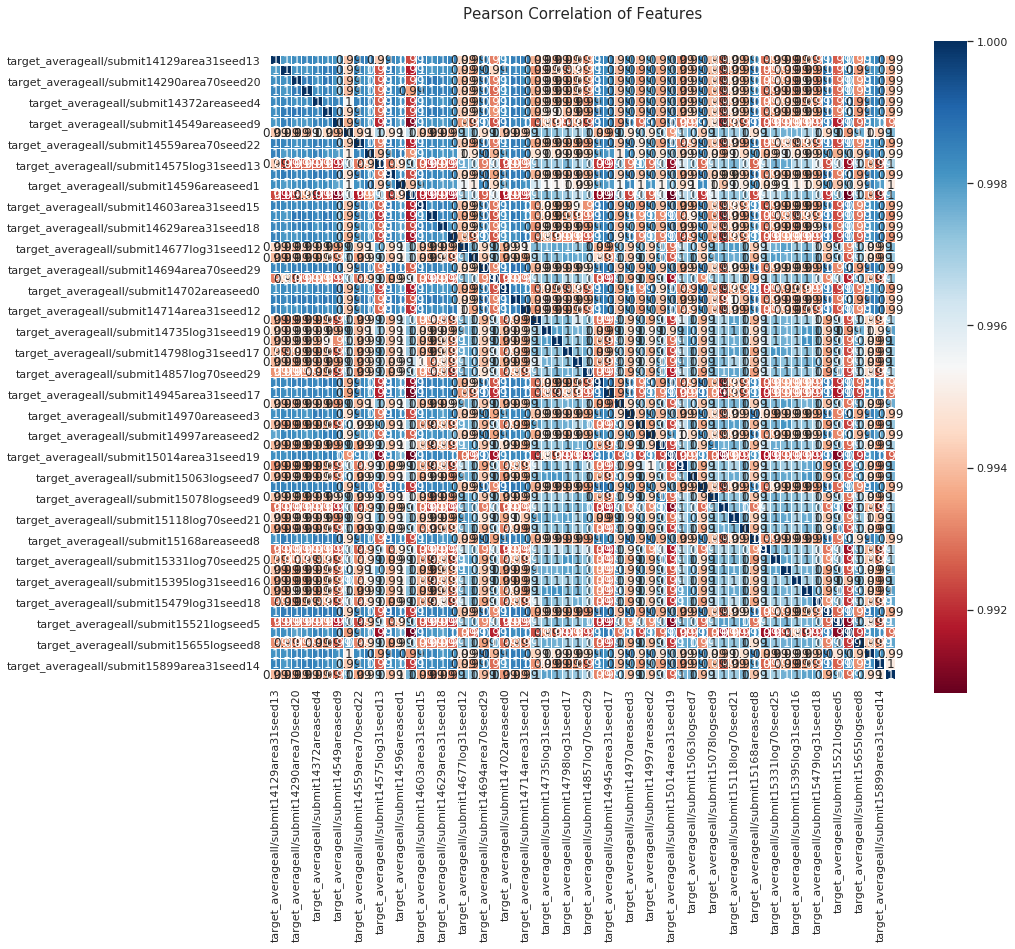

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(pred_df.drop(columns=['id','target']).astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

plt.ylim([oof_df.drop(columns=['id','target']).shape[1]- 0.1, 0.1])
plt.show()

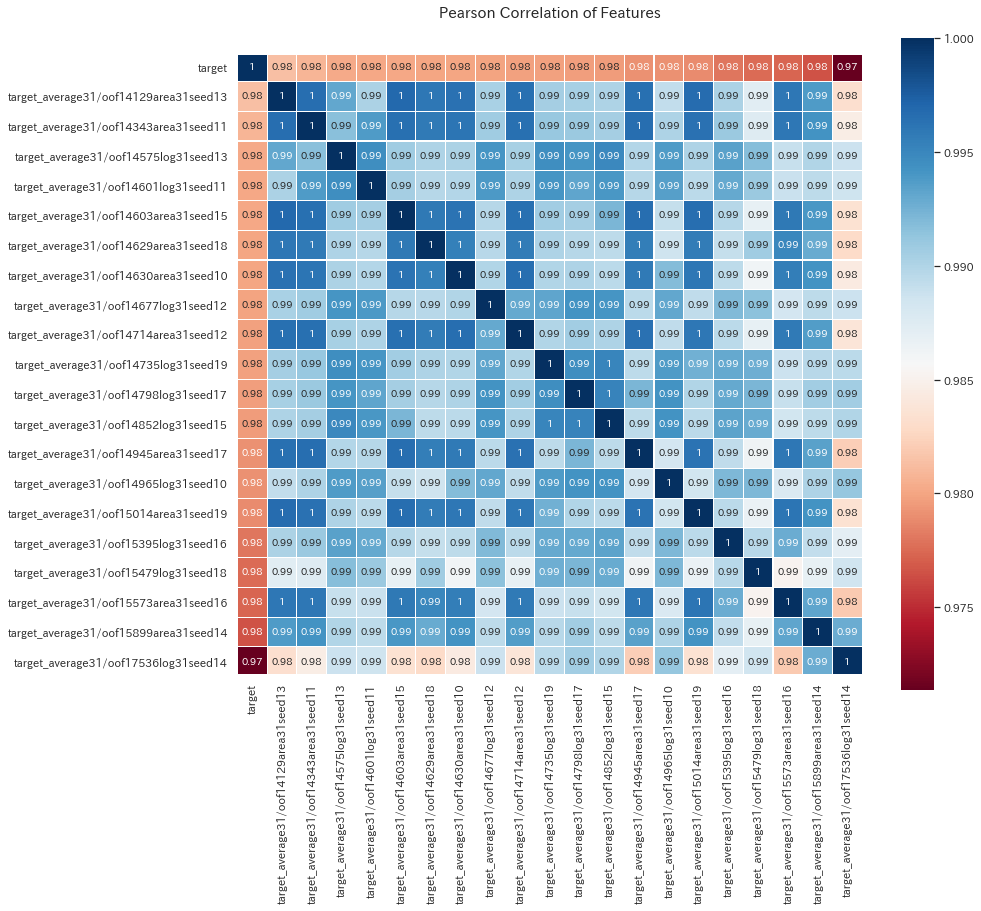

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(oof_df.drop(columns='id').astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

plt.ylim([oof_df.drop(columns='id').shape[1]- 0.1, 0.1])
plt.show()

In [211]:
pred_df['mean']=pred_df.drop(columns=['id','target']).mean(axis=1)

In [212]:
oof_df['mean']=oof_df.drop(columns=['id','target']).mean(axis=1)

In [229]:
#all
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse(oof_df['target'],oof_df['mean'])

13558.018359988886

In [214]:
submit_df=pd.read_csv('./submit/sample_submit.csv',header=None).rename(columns={0:'id',1:'target'})
submit_df['target']=pred_df['mean']

In [216]:
modi_df=pd.read_csv('./team_data/modify_test_target.csv',index_col=0)
modi_df=modi_df.merge(submit_df,on='id',how='inner')
modi_df['diff']=modi_df['target']-modi_df['賃料']
rmse(modi_df['target'],modi_df['賃料'])

2878.5454793615563

In [219]:
submit_df=submit_df.set_index('id')
submit_df.loc[modi_df['id'].values,'target']=modi_df.set_index('id').loc[modi_df['id'].values,'賃料']
submit_df=submit_df.reset_index()

In [222]:
path='./submit/1107_all_modify'
submit_df.to_csv(path+'.csv', index=None, header=None)
pd.Series(test_dfs).to_csv(path+'.txt', index=False)

In [226]:
past_df=pd.read_csv('./submit/1107_31_modify.csv',header=None)

In [228]:
rmse(past_df[1],submit_df['target'])

1615.0624352423913

In [223]:
submit_df

,id,target
0,31471,118700.415437
1,31472,119713.995828
2,31473,74810.063474
3,31474,62031.091667
4,31475,93012.481692
...,...,...
31257,62728,101043.192507
31258,62729,102101.032519
31259,62730,174285.965908
31260,62731,278336.101257
